Pick any image based dataset from the list, implement the preprocessing and justify the
preprocessing steps, extract features and justify the methods used, select features and justify the
methods used. Some of this is done already in one of the previous assignments. You can reuse
things. 

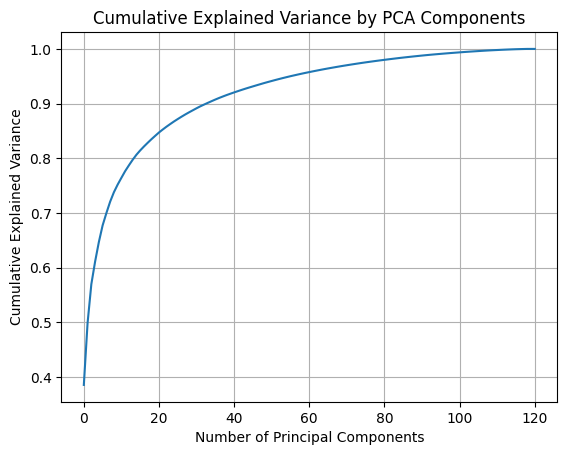

Number of components explaining 95% variance: 56
KNN Accuracy: 96.77%, Time: 0.08s
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00  

/home/fredrir/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fredrir/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fredrir/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fredrir/.loca

Validation accuracy: 12.90%
Training CNN with lr=0.001, dropout=0.5, batch_size=64
Validation accuracy: 90.32%
Training CNN with lr=0.001, dropout=0.3, batch_size=32
Validation accuracy: 96.77%
Training CNN with lr=0.001, dropout=0.3, batch_size=64
Validation accuracy: 96.77%
Training CNN with lr=0.0001, dropout=0.5, batch_size=32
Validation accuracy: 3.23%
Training CNN with lr=0.0001, dropout=0.5, batch_size=64
Validation accuracy: 9.68%
Training CNN with lr=0.0001, dropout=0.3, batch_size=32
Validation accuracy: 6.45%
Training CNN with lr=0.0001, dropout=0.3, batch_size=64
Validation accuracy: 12.90%
Best CNN Accuracy: 96.77% with parameters {'learning_rate': 0.001, 'dropout_rate': 0.3, 'batch_size': 32}
CNN Time: 29.55s
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
          10       1.00      1.00      

/home/fredrir/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fredrir/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fredrir/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier  # Basic ML Algorithm
from sklearn.svm import SVC                        # Advanced ML Algorithm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Preprocessing function
def preprocess_image(image_path, downsample_size=(64, 64)):
    """
    Convert image to grayscale, resize, and normalize pixel values.
    Justification:
    - Grayscale reduces computational complexity without significant loss of information.
    - Resizing standardizes input size, essential for batch processing in neural networks.
    - Normalization scales features to [0, 1], improving convergence during training.
    """
    image = Image.open(image_path).convert('L')  # Grayscale conversion
    image = image.resize(downsample_size)        # Resizing
    image_array = np.array(image, dtype=np.float32)
    normalized_image = image_array / 255.0       # Normalization
    return normalized_image

# Load and preprocess images
image_dir = 'facial-emotion-recognition/images'
images = []
labels = []

# Assuming images are organized in directories per emotion
emotion_labels = os.listdir(image_dir)

for emotion_label in emotion_labels:
    emotion_dir = os.path.join(image_dir, emotion_label)
    if os.path.isdir(emotion_dir):
        image_files = os.listdir(emotion_dir)
        for image_file in image_files:
            image_path = os.path.join(emotion_dir, image_file)
            if os.path.isfile(image_path):
                image = preprocess_image(image_path)
                images.append(image)
                labels.append(emotion_label)
            else:
                print(f"File not found: {image_path}")
    else:
        print(f"Directory not found: {emotion_dir}")

images = np.array(images)
labels = np.array(labels)

# Display sample images
def display_sample_images(images, labels, label_encoder):
    plt.figure(figsize=(10, 5))
    for i in range(1, 6):
        idx = np.random.randint(0, len(images))
        plt.subplot(1, 5, i)
        plt.imshow(images[idx].reshape(64, 64), cmap='gray')
        plt.title(label_encoder.inverse_transform([labels_encoded[idx]])[0])
        plt.axis('off')
    plt.suptitle('Sample Images from Dataset')
    plt.show()

# Encode emotion labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Display sample images
display_sample_images(images, labels_encoded, label_encoder)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

# Flatten images for ML algorithms
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize features
scaler = StandardScaler()
X_train_flat_scaled = scaler.fit_transform(X_train_flat)
X_test_flat_scaled = scaler.transform(X_test_flat)

# Feature Extraction using PCA
pca = PCA()
pca.fit(X_train_flat_scaled)

# Explained Variance - Individual and Cumulative
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot individual explained variance (Scree Plot)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Select number of components explaining 95% variance
k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {k}")

# Transform data using PCA
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train_flat_scaled)
X_test_pca = pca.transform(X_test_flat_scaled)

# Basic ML Algorithm: K-Nearest Neighbors
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
knn_time = time.time() - start_time
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy*100:.2f}%, Time: {knn_time:.2f}s")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_, zero_division=0))

# Confusion Matrix for KNN
disp_knn = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=label_encoder.classes_, xticks_rotation='vertical')
plt.title('KNN Confusion Matrix')
plt.show()

# Advanced ML Algorithm: Support Vector Machine
start_time = time.time()
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)
svm_time = time.time() - start_time
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy*100:.2f}%, Time: {svm_time:.2f}s")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_, zero_division=0))

# Confusion Matrix for SVM
disp_svm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=label_encoder.classes_, xticks_rotation='vertical')
plt.title('SVM Confusion Matrix')
plt.show()

# CNN with Hyperparameter Tuning
# Reshape data
X_train_cnn = X_train.reshape(-1, 64, 64, 1)
X_test_cnn = X_test.reshape(-1, 64, 64, 1)
y_train_cnn = to_categorical(y_train, num_classes=len(label_encoder.classes_))
y_test_cnn = to_categorical(y_test, num_classes=len(label_encoder.classes_))

# Hyperparameters
learning_rates = [0.001, 0.0001]
dropout_rates = [0.5, 0.3]
batch_sizes = [32, 64]
best_accuracy = 0
best_params = {}
start_time = time.time()

for lr in learning_rates:
    for dr in dropout_rates:
        for bs in batch_sizes:
            print(f"Training CNN with lr={lr}, dropout={dr}, batch_size={bs}")
            model = Sequential()
            model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
            model.add(MaxPooling2D((2, 2)))
            model.add(Dropout(dr))
            model.add(Conv2D(64, (3, 3), activation='relu'))
            model.add(MaxPooling2D((2, 2)))
            model.add(Dropout(dr))
            model.add(Flatten())
            model.add(Dense(128, activation='relu'))
            model.add(Dropout(dr))
            model.add(Dense(len(label_encoder.classes_), activation='softmax'))
            optimizer = Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
            early_stopping = EarlyStopping(monitor='val_loss', patience=3)
            history = model.fit(
                X_train_cnn, y_train_cnn,
                epochs=20, batch_size=bs,
                validation_split=0.1,
                callbacks=[early_stopping],
                verbose=0
            )
            loss, accuracy = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
            print(f"Validation accuracy: {accuracy*100:.2f}%")
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'learning_rate': lr, 'dropout_rate': dr, 'batch_size': bs}
                best_model = model
                best_history = history

cnn_time = time.time() - start_time
print(f"Best CNN Accuracy: {best_accuracy*100:.2f}% with parameters {best_params}")
print(f"CNN Time: {cnn_time:.2f}s")

# CNN Classification Report
y_pred_cnn = best_model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn_classes, target_names=label_encoder.classes_, zero_division=0))

# Confusion Matrix for CNN
disp_cnn = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cnn_classes, display_labels=label_encoder.classes_, xticks_rotation='vertical')
plt.title('CNN Confusion Matrix')
plt.show()

# Plot CNN Learning Curves
def plot_learning_curves(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_curves(best_history)

# Comparison
print("\nComparison of Algorithms:")
print(f"KNN - Accuracy: {knn_accuracy*100:.2f}%, Time: {knn_time:.2f}s")
print(f"SVM - Accuracy: {svm_accuracy*100:.2f}%, Time: {svm_time:.2f}s")
print(f"CNN - Accuracy: {best_accuracy*100:.2f}%, Time: {cnn_time:.2f}s")
